<a href="https://colab.research.google.com/github/bovo1/Pet_Skin_Disease/blob/main/pet_skin_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import glob
import shutil
from tqdm.notebook import tqdm
import cv2
import json
import numpy as np
import pandas as pd

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/PetHealth/skin_disease/Dog")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PetHealth/skin_disease/Dog


### **데이터 전처리**

In [3]:
#각 클래스마다 train 1,000장, val 150장
train_image_list = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/images/train/*.jpg')
val_image_list = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/images/val/*.jpg')

disease_name = [
    'A1_구진_플라크',
    'A2_비듬_각질_상피성잔고리',
    'A3_태선화_과다색소침착',
    'A4_농포_여드름',
    'A5_미란_궤양',
    'A6_결절_종괴',
]

In [4]:
print(len(train_image_list), len(val_image_list))

31337 2700


#### 데이터 복사

In [ ]:
train_dest = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images/train'
val_dest = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images/val'

train_amount = 1000
val_amount = 150

a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0

for i in tqdm(train_image_list):
  if 'A1' in i and a1 <= train_amount:
    shutil.copy(i, train_dest)
    a1 += 1
  elif 'A2' in i and a2 < train_amount:
    shutil.copy(i, train_dest)
    a2 += 1
  elif 'A3' in i and a3 < train_amount:
    shutil.copy(i, train_dest)
    a3 += 1
  elif 'A4' in i and a4 < train_amount:
    shutil.copy(i, train_dest)
    a4 += 1
  elif 'A5' in i and a5 < train_amount:
    shutil.copy(i, train_dest)
    a5 += 1
  elif 'A6' in i and a6 < train_amount:
    shutil.copy(i, train_dest)
    a6 += 1

a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0

for j in tqdm(val_image_list):
  if 'A1' in j and a1 < val_amount:
    shutil.copy(j, val_dest)
    a1 += 1
  elif 'A2' in j and a2 < val_amount:
    shutil.copy(j, val_dest)
    a2 += 1
  elif 'A3' in j and a3 < val_amount:
    shutil.copy(j, val_dest)
    a3 += 1
  elif 'A4' in j and a4 < val_amount:
    shutil.copy(j, val_dest)
  elif 'A5' in j and a5 < val_amount:
    shutil.copy(j, val_dest)
    a5 += 1
  elif 'A6' in j and a6 < val_amount:
    shutil.copy(j, val_dest)
    a6 += 1

0it [00:00, ?it/s]

  0%|          | 0/2700 [00:00<?, ?it/s]

In [69]:
a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0
moved_train_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images/train/*.jpg')
moved_val_image = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images/val/*.jpg')
for i in moved_train_image:
  if 'A1' in i:
    a1 += 1
  elif 'A2' in i:
    a2 += 1
  elif 'A3' in i:
    a3 += 1
  elif 'A4' in i:
    a4 += 1
  elif 'A5' in i:
    a5 += 1
  elif 'A6' in i:
    a6 += 1

train_count = [a1,a2,a3,a4,a5,a6]

a1, a2, a3, a4, a5, a6 = 0, 0, 0, 0, 0, 0
for i in moved_val_image:
  if 'A1' in i:
    a1 += 1
  elif 'A2' in i:
    a2 += 1
  elif 'A3' in i:
    a3 += 1
  elif 'A4' in i:
    a4 += 1
  elif 'A5' in i:
    a5 += 1
  elif 'A6' in i:
    a6 += 1

val_count = [a1,a2,a3,a4,a5,a6]

print('train_count: ', train_count)
print('val_count: ', val_count)

train_count:  [1001, 1001, 1001, 1001, 1001, 1001]
val_count:  [151, 150, 151, 150, 150, 150]


In [4]:
#json 옮기기
D_A1_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A1_구진_플라크/*.json')
D_A2_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A2_비듬_각질_상피성잔고리/*.json')
D_A3_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A3_태선화_과다색소침착/*.json')
D_A4_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A4_농포_여드름/*.json')
D_A5_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A5_미란_궤양/*.json')
D_A6_D_json_path = glob.glob('/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin/camera/유증상/A6_결절_종괴/*.json')

original_json_list = [
    D_A1_D_json_path,
    D_A2_D_json_path,
    D_A3_D_json_path,
    D_A4_D_json_path,
    D_A5_D_json_path,
    D_A6_D_json_path
]

print(len(original_json_list[0]))

4060


In [33]:
for i in tqdm(original_json_list):
  for j in i:
    json_name = j.split('/')[-1]
    json_name = json_name.split('.')[0]
    for k in moved_val_image:
      image_name = k.split('/')[-1]
      image_name = image_name.split('.')[0]
      if json_name == image_name:
        #print(json_name)
        shutil.copy(j, '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json/val')

  0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

fe = fm.FontEntry(fname=r'/content/drive/MyDrive/MaruBuri-Regular.ttf', name='MaruBuri-Regular') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'MaruBuri-Regular'}) #폰트설정

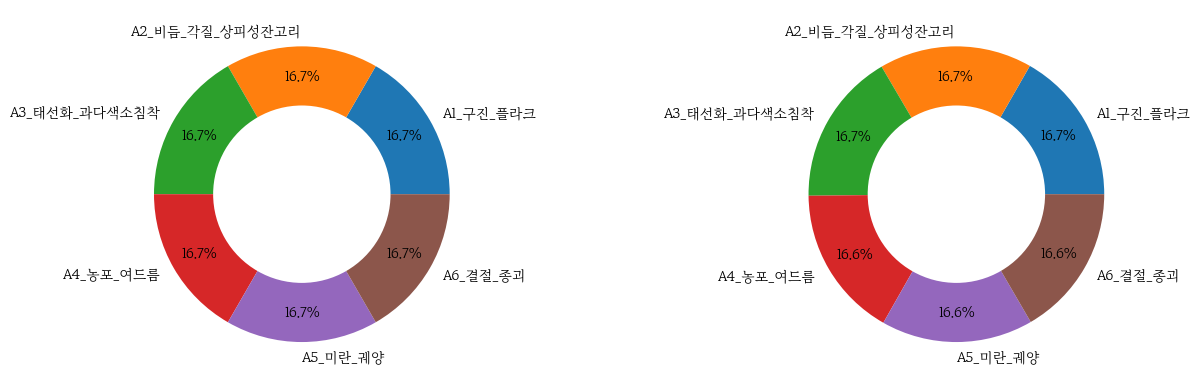

In [47]:
wed={"width": 0.4}
plt.subplot(1,2,1)
plt.pie(train_count, labels=disease_name, autopct='%.1f%%', wedgeprops=wed, pctdistance=0.8)
plt.plot('Train')
plt.subplot(1,2,2)
plt.pie(val_count, labels=disease_name, autopct='%.1f%%', wedgeprops=wed, pctdistance=0.8)
plt.plot('Val')
plt.subplots_adjust(right=2)
plt.show()

(800, 633, 3)
Polygon:  [1674, 466, 1657, 485, 1657, 503, 1665, 522, 1690, 517, 1705, 509, 1713, 497, 1718, 479, 1707, 463, 1690, 459, 1674, 466]
Bounding box:  [1657, 459, 61, 63]


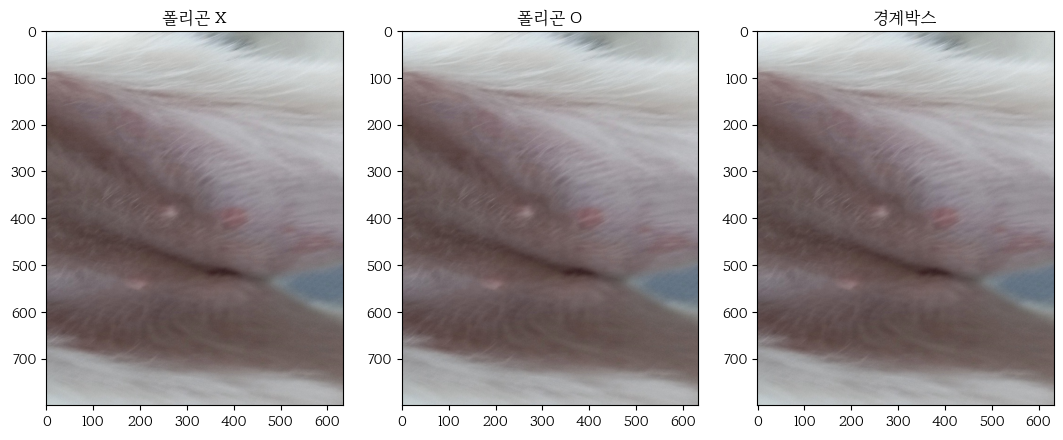

In [57]:
read_image = moved_train_image[25]
read_json = moved_train_image[25].split('/')[-1]
read_json = read_json.split('.')[0]
read_json = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/json/train/' + read_json + '.json'

image = cv2.imread(read_image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,16))
print(image.shape)
plt.subplot(1,3,1)
plt.title('폴리곤 X')
plt.imshow(image)


#json으로 폴리곤 표시
with open(read_json, 'r') as f:
  data = json.load(f)

polygon_list = list(data['labelingInfo'][0]['polygon']['location'][0].values())
bbox_list = list(data['labelingInfo'][1]['box']['location'][0].values())
print('Polygon: ',polygon_list)
print('Bounding box: ',bbox_list)

plt.subplot(1,3,2)
plt.title('폴리곤 O')
polygon_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
polygon_image = cv2.cvtColor(polygon_image, cv2.COLOR_BGR2RGB)

np_poly_list = []
np_bbox_list = []

for i in range(0, len(polygon_list)-1, 2):
  np_poly_list.append([polygon_list[i], polygon_list[i+1]])
for j in range(0, len(bbox_list)-1, 2):
  np_bbox_list.append([bbox_list[j], bbox_list[j+1]])

np_poly = np.array(np_poly_list, dtype=np.int32)
np_bbox = np.array(np_bbox_list, dtype=np.int32)

cv2.fillPoly(polygon_image, pts=[np_poly], color=(0,0,255))
plt.imshow(polygon_image)

plt.subplot(1,3,3)
bbox_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
bbox_image = cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB)
plt.title('경계박스')
cv2.rectangle(bbox_image, (bbox_list[0], bbox_list[1], bbox_list[2], bbox_list[3]), (0,0,255), 5)
plt.imshow(bbox_image)

1687 490


ValueError: zero-size array to reduction operation minimum which has no identity

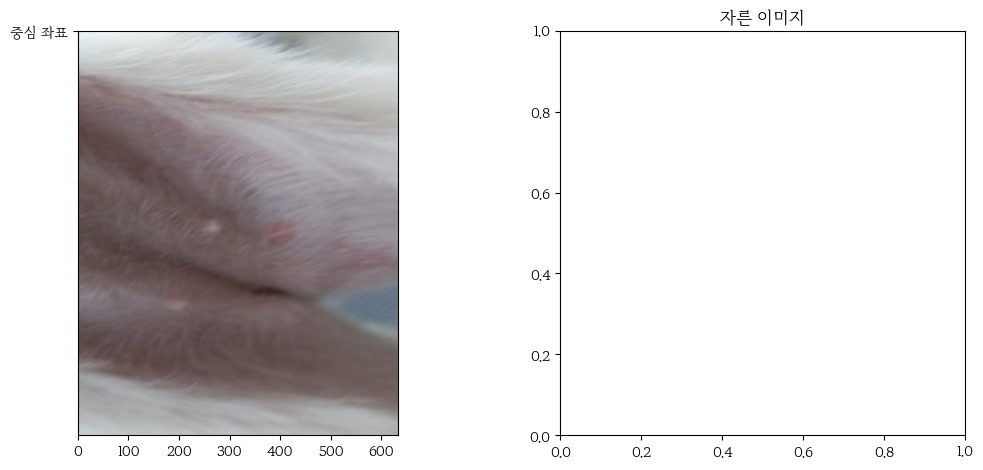

In [59]:
#------------- 이미지 전처리
#자르기
image_shape = list(image.shape)
center_x = (bbox_list[0] + (bbox_list[0] + bbox_list[2])) // 2
center_y = (bbox_list[1] + (bbox_list[1] + bbox_list[3])) // 2

print(center_x, center_y)

point_image = cv2.imread(read_image, cv2.IMREAD_COLOR)
point_image = cv2.cvtColor(point_image, cv2.COLOR_BGR2RGB)
value_digit = 2

plt.figure(figsize=(7,10))
plt.subplots_adjust(right=1.5, top=1)

plt.subplot(2,2,1)
plt.plot('중심 좌표')
cv2.line(point_image, (center_x, center_y),(center_x, center_y), (0,255,0), 30)
cv2.rectangle(point_image, (center_x-400, center_y-400, 800,800), (0,0,255), 10)
plt.imshow(point_image)

plt.subplot(2,2,2)
plt.title('자른 이미지')
crop_digit = 400
#image_cropped = image[bbox_list[1]:bbox_list[1]+bbox_list[3], bbox_list[0]:bbox_list[0]+bbox_list[2]]
image_cropped = image[center_y-400:center_y+400, center_x-400:center_x+400]
plt.imshow(image_cropped)

print(image_cropped.shape)

In [74]:
#이미지 전처리 함수

# !!!!!!! crop image 이상하다 바꿔야함...
save_image_dir = '/content/drive/MyDrive/PetHealth/skin_disease/Dog/skin2/images/val/'
def image_preprocessing(image_adr):
  image = cv2.imread(image_adr)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_shape = list(image.shape)
  image_name = image_adr.split('/')[-1]

  center_x = (bbox_list[0] + (bbox_list[0] + bbox_list[2])) // 2
  center_y = (bbox_list[1] + (bbox_list[1] + bbox_list[3])) // 2
  crop_digit = 400
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.imwrite((save_image_dir+image_name), image)
  #image_cropped = image[center_y-crop_digit:center_y+crop_digit, center_x-crop_digit:center_x+crop_digit]
  #cv2.imwrite((save_image_dir+image_name), image_cropped)

for i in tqdm(moved_val_image):
  #print(i, moved_val_image[1])
  image_preprocessing(i)
  #print(i.split('/')[-1] + '완료')

  0%|          | 0/902 [00:00<?, ?it/s]

In [8]:
from ultralytics import YOLO

In [9]:
Test_M = YOLO('yolov8l-seg.yaml').load('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 132MB/s]


Transferred 595/657 items from pretrained weights


In [10]:
Test_M.info()

YOLOv8l-seg summary: 401 layers, 45997728 parameters, 45997712 gradients, 221.1 GFLOPs


(401, 45997728, 45997712, 221.13428480000005)

In [ ]:
Test_M.train(data='/content/drive/MyDrive/PetHealth/skin_disease/Dog/Dog_data.yaml', epochs=100, optimizer='Adam', batch=16, rect=True, imgsz=800)

In [ ]:
#Test_M.tune(data='/content/drive/MyDrive/PetHealth/skin_disease/Dog/Dog_data.yaml', epochs=0, iterations=300, optimizer='auto', plots=False, save=True, val=False)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/PetHealth/skin_disease/Dog/runs/segement